Домашнее задание к уроку № 9.

Инструменты разметки наборов данных

Задание 1.
Выберите датасет, который имеет отношение к вашей области интересов или исследований. Датасет должен содержать неструктурированные данные, требующие разметки для решения конкретной задачи, например, анализа настроений или распознавания именованных сущностей.

Задание 2.
Выполните разметку на основе правил (rule-based labeling) на подмножестве выбранного датасета. Разработайте и реализуйте набор правил или условий, которые позволят автоматически присваивать метки данным на основе определенных шаблонов или критериев.

Задача 3.
Выполните разметку вручную отдельного подмножества выбранного датасета с помощью выбранного вами инструмента разметки.

Задача 4.
Объедините данные, размеченные вручную, с данными, размеченными на основе правил. Объедините два подмножества размеченных данных в один набор данных, сохранив при этом соответствующую структуру и целостность.

Задача 5.
Обучите модель машинного обучения, используя объединенный набор размеченных данных. Разделите датасет на обучающий и тестовый наборы и используйте обучающий набор для обучения модели.

Задача 6.
Оценить эффективность обученной модели на тестовом датасете. Используйте подходящие метрики оценки. Интерпретируйте результаты и проанализируйте эффективность модели в решении задачи разметки.

In [44]:
#pip install tensorflow


  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.3.3-py3-none-any.whl.metadata (5.7 kB)
  Using ca

In [50]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pathlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [11]:
data = pd.read_csv("Pokemon.csv")

data


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Цель данного  набора данных - создать модель, прогнозирующую  силу покемона. Для этого они были распределены в соответствии с  Attack, Defense

Функция для разметки, основанной на правилах
HP_column - уровень хп
Defense_column - уровень защиты 


In [12]:
data


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [13]:
def assign_category(row, HP_column, Attack_column):
    if row[HP_column] > 80 and row[Attack_column] > 80:
        return 1
    else:
        return 0

Для решения задачи разметки нужно убедиться что для всех покемонов заполнены поля 

In [14]:
data[['HP', 'Attack']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   HP      800 non-null    int64
 1   Attack  800 non-null    int64
dtypes: int64(2)
memory usage: 12.6 KB


In [15]:
data['power_label'] = data.apply(assign_category, args=('HP', 'Attack'), axis=1)

Размечаем power label и проверяем, что все строки заполнены. 

In [17]:
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,power_label
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,0
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,0
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,0
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,0


In [16]:
data['power_label'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 800 entries, 0 to 799
Series name: power_label
Non-Null Count  Dtype
--------------  -----
800 non-null    int64
dtypes: int64(1)
memory usage: 6.4 KB


In [11]:
#pip install label-studio

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/54.8 kB ? eta -:--:--
     -------------------------------------- 54.8/54.8 kB 947.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/53.0 kB ? eta -:--:--
     ---------------------------------------- 53.0/53.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished w

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
aiobotocore 2.7.0 requires botocore<1.31.65,>=1.31.16, but you have botocore 1.34.118 which is incompatible.
conda-build 24.1.2 requires jsonschema>=4.19, but you have jsonschema 3.2.0 which is incompatible.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
jupyterlab-server 2.25.1 requires jsonschema>=4.18.0, but you have jsonschema 3.2.0 which is incompatible.
jupyter-events 0.8.0 requires jsonschema[format-nongpl]>=4.18.0, but you have jsonschema 3.2.0 which is incompatible.


In [14]:
datamanual = data[['HP', 'Attack']]

FileNameFull = "datamanual.csv"

datamanual.to_csv(FileNameFull, index = False)

In [35]:
manual_data = pd.read_csv('1.csv', engine='python')

### Объдиняем существующий датасет с датасетом с размещенными вручную значениями

data = pd.merge(data, manual_data, on = ['HP', 'Attack'], how = 'inner')
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Legendary,power_label,annotator_x,annotation_id,annotator_y,choice,created_at,id,lead_time,updated_at
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,0,1,1,1,0.0,2024-06-04T06:35:51.416639Z,1,6.462,2024-06-04T06:35:51.416639Z
1,152,Chikorita,Grass,NaN,318,45,49,65,49,65,...,False,0,1,1,1,0.0,2024-06-04T06:35:51.416639Z,1,6.462,2024-06-04T06:35:51.416639Z
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,0,1,30,1,1.0,2024-06-04T06:44:26.860273Z,3,13.537,2024-06-04T06:44:26.860273Z
3,55,Golduck,Water,NaN,500,80,82,78,95,80,...,False,0,1,30,1,1.0,2024-06-04T06:44:26.860273Z,3,13.537,2024-06-04T06:44:26.860273Z
4,154,Meganium,Grass,NaN,525,80,82,100,83,100,...,False,0,1,30,1,1.0,2024-06-04T06:44:26.860273Z,3,13.537,2024-06-04T06:44:26.860273Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,704,Goomy,Dragon,NaN,300,45,50,35,55,75,...,False,0,1,24,1,0.0,2024-06-04T06:42:37.414945Z,49,2.588,2024-06-04T06:42:37.414945Z
157,44,Gloom,Grass,Poison,395,60,65,70,85,75,...,False,0,1,25,1,0.0,2024-06-04T06:42:39.557216Z,50,1.974,2024-06-04T06:42:39.557216Z
158,94,Gengar,Ghost,Poison,500,60,65,60,130,75,...,False,0,1,25,1,0.0,2024-06-04T06:42:39.557216Z,50,1.974,2024-06-04T06:42:39.557216Z
159,94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,...,False,0,1,25,1,0.0,2024-06-04T06:42:39.557216Z,50,1.974,2024-06-04T06:42:39.557216Z


Удаляем все ненужные  столбцы

In [38]:
#data = data.drop(['annotator_y'], axis=1)


In [39]:
data


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,power_label,choice
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0,0.0
1,152,Chikorita,Grass,NaN,318,45,49,65,49,65,45,2,False,0,0.0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0,1.0
3,55,Golduck,Water,NaN,500,80,82,78,95,80,85,1,False,0,1.0
4,154,Meganium,Grass,NaN,525,80,82,100,83,100,80,2,False,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,704,Goomy,Dragon,NaN,300,45,50,35,55,75,40,6,False,0,0.0
157,44,Gloom,Grass,Poison,395,60,65,70,85,75,40,1,False,0,0.0
158,94,Gengar,Ghost,Poison,500,60,65,60,130,75,110,1,False,0,0.0
159,94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False,0,0.0


In [40]:
label_encoder = LabelEncoder()
data['power_label'] = label_encoder.fit_transform(data['power_label'])

In [41]:
# Разделение выборок на обучающую и тестовую
X = data[['HP', 'Attack']].values
y = data['power_label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [46]:
# Определяем простую модель ИНС прямого распространения 
# с тремя слоями нейронов для двух входных переменных и 
# трех выходов.

model = Sequential([
    Dense(10, input_dim=2, activation='relu'),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

In [47]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [48]:
history = model.fit(X_train, y_train, epochs=75, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.9705 - loss: 0.2039 - val_accuracy: 0.8980 - val_loss: 0.3629
Epoch 2/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9705 - loss: 0.2168 - val_accuracy: 0.8980 - val_loss: 0.3276
Epoch 3/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9851 - loss: 0.1134 - val_accuracy: 0.9184 - val_loss: 0.3010
Epoch 4/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9549 - loss: 0.2898 - val_accuracy: 0.9184 - val_loss: 0.3117
Epoch 5/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9778 - loss: 0.1032 - val_accuracy: 0.9184 - val_loss: 0.3099
Epoch 6/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9737 - loss: 0.2014 - val_accuracy: 0.8980 - val_loss: 0.3334
Epoch 7/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9768 - loss: 0.1687 - val_accuracy: 0.8980 - val_loss: 0.3461
Epoch 8/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9757 - loss: 0.1244 - val_accuracy: 0.8980 - val_loss: 0.3425
Epoch 9

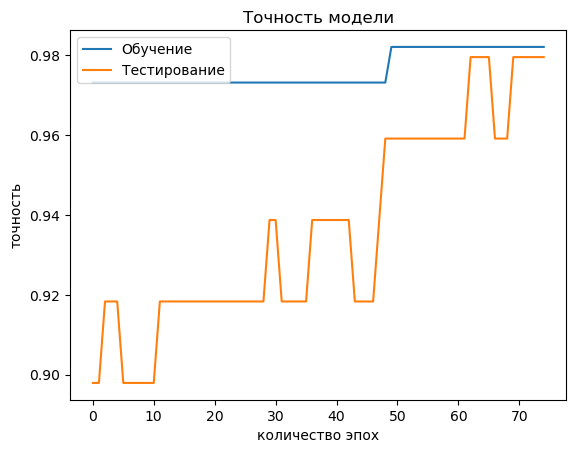

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['Обучение', 'Тестирование'], loc='upper left')
plt.show()

In [52]:
loss, accuracy = model.evaluate(X_test, y_test)
y_test_predicted = np.argmax(model.predict(X_test), axis=1)
f1 = f1_score(y_test, y_test_predicted, average='weighted')
print(f'Test Loss (Потери): {loss},\nTest Accuracy (Точность): {accuracy}')
print(f'F-score = {f1}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9864 - loss: 0.1171 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Test Loss (Потери): 0.1541472226381302,
Test Accuracy (Точность): 0.9795918464660645
F-score = 0.9694929518199032


Вывод: эффективность модели в решении задачи разметки при точности 96% можно считать приемлемой.